In [11]:
from dlem import load_reader
import matplotlib.pyplot as plt
import numpy as np

In [17]:
data = load_reader('datareader_cooler')("../../../loopExtraction/data/4DNFI9GMP2J8.mcool", 1000, 300, 150)

chr8 110250000 110550000


/data/src/loopextrusion_pytorch/.conda/lib/python3.11/site-packages/cooltools/lib/numutils.py:1376: RuntimeWarning: invalid value encountered in divide
  val_cur = ar_cur / armask_cur


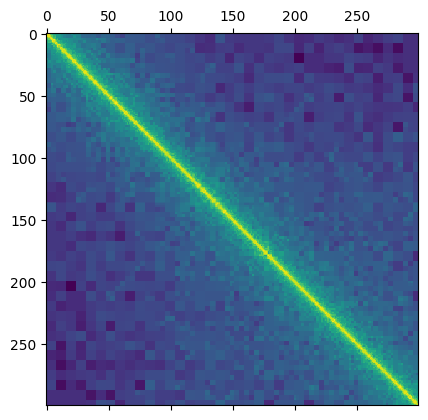

In [21]:
plt.matshow(np.log(data[10000][0]))